# Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

%matplotlib inline

In [4]:
df = pd.read_csv("prediction_ready.csv", parse_dates=["start_time"])

In [5]:
df.head()

,start_time,month,day,hour,mean_duration,max_temp,precip,trips,isWeekday
0,2016-01-01 00:00:00,1.0,1.0,0.0,13.200000,-4.4,0.0,25,0
1,2016-01-01 01:00:00,1.0,1.0,1.0,10.195122,-5.0,0.0,41,0
2,2016-01-01 02:00:00,1.0,1.0,2.0,10.461538,-5.0,0.0,39,0
3,2016-01-01 03:00:00,1.0,1.0,3.0,15.388889,-5.6,0.0,18,0
4,2016-01-01 04:00:00,1.0,1.0,4.0,45.700000,-5.0,0.0,10,0


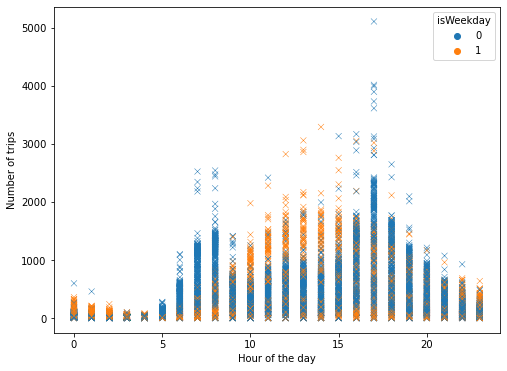

In [15]:
plt.figure(figsize=(8,6))
plt.xlabel("Hour of the day")
plt.ylabel("Number of trips")
sns.scatterplot(data=df,x="hour" ,y="trips",marker="x",hue="isWeekday")
plt.show()